## Predicting Heart Disease Using Machine Learning
    ##### This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone survived the sinking of the Titanic.

    We're going to take the following approach:
    1. Problem Definition
    2. Data
    3. Evaluation
    4. Features
    5. Modeling
    6. Experimentation

# 1. Problem Definition

Given paramaters about a passenger aboard the Titanic can we determine whether the passenger survived its crash. 

# 2. Data
The data for this project comes from: https://www.kaggle.com/c/titanic/data?select=test.csv

# 3. Evaluation
The closer we can get to 100% accuracy the better for this machine learning competition. If I can reach 90% accuracy I will consider this a success.

# 4. Features
**Data Dictionary:**
* Survival - Survival 
    * (0 = No, 1 = Yes)
* Pclass - Ticket class 
    * (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex - Sex
* Age - Age in years
* SibSp - # of siblings / spouses aboard the Titanic
* Parch - # of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Cabin number
* Embarked - Port of Embarkation 
    * (C = Cherbourg, Q = Queenstown, S = Southampton)


# Preparing Tools
Pandas, numpy, and matlib for data analysis and manipulation

In [2]:
# Regular exploratory data analysis and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Turn Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [3]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration
Goal is to find out more information about the data and become an expert on the data we are working with
* What question(s) are we trying to solve?
* What kind of data do we have and how do we treat different types?
* What data is missing and how do we deal with it?
* Where are the outliers and why should we care aobut them?
* How can you remove, change, or add features to get more out of your data?

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df = df.drop("PassengerId", axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.shape

(891, 11)

# Initial Thoughts
Limitations of data and my knowledge:
* The cabins could provide helpful info but they are in a jumbled string form.
    * Is there an easy way to gather relevent info and convert them?
        * Look more into cabin numbers


* The column Age is missing 177 out of 891 entries
    * Should I have the missing values be filled with the median age?
        * I assume age will be an important metric for who was allowed onto lifeboats and such


* Is the name column important?
    * Can we drop name?
    * Can we convert name or isolatte important parts from it?


* Embarked column is missing 2 values.
    * Probably safe to drop those two
    * Or fill them with the average value?


* Revisit converting objects to useful values


* Change sex to 0 to 1


In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [11]:
# If you were a female you had about a 75% chance to live, males had about a 19% chance

In [12]:
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


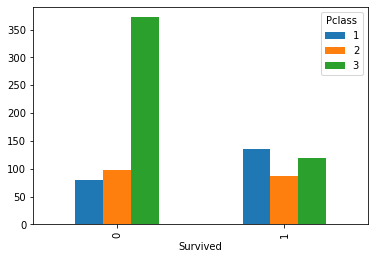

In [13]:
pd.crosstab(df.Survived, df.Pclass).plot(kind="bar")

In [14]:
# Suvival Percentage Based on Ticket Class
first_class_perc = 136/len(df[df.Pclass==1])
second_class_perc = 87/len(df[df.Pclass==2])
third_class_perc = 119/len(df[df.Pclass==3])

first_class_perc, second_class_perc, third_class_perc

(0.6296296296296297, 0.47282608695652173, 0.24236252545824846)

In [15]:
my_dict = {"1st Class" : 0.6296296296296297,
           "2nd Class" :  0.47282608695652173,
           "3rd Class" :   0.24236252545824846
    
}

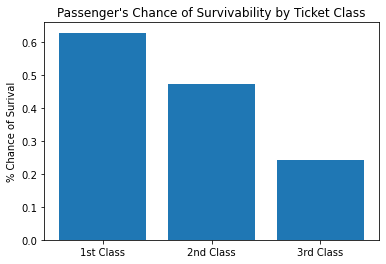

In [16]:
fig, ax = plt.subplots()
ax.bar(my_dict.keys(), my_dict.values());

# Customize
ax.set(ylabel="% Chance of Surival",
      title="Passenger's Chance of Survivability by Ticket Class");


In [17]:
plt.style.use("fivethirtyeight")

In [18]:
# Ticket class (Pclass) plays a huge factor in determining probability of survival

# A lot of this data needs to be converted and tidied up

Action Steps:
* Drop name
* Drop ticket
* Change sex to 1 = male, 0 = female
* I'd love to do something with the cabin data by finding the letter number and searching where that was on the ship but for sake of time I will drop cabin. If my data is not strong I will look back into this


In [19]:
# Dropped Tickt and Name
df = df.drop(["Ticket","Name"], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [20]:
# Changed female to 0
df["Sex"] = df["Sex"].str.replace("female", "0")
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [21]:
# Changed male to 1 and converted column to int
df["Sex"] = df["Sex"].str.replace("male", "1").astype(int)

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,NaN,1,2,23.4500,NaN,S
889,1,1,1,26.0,0,0,30.0000,C148,C


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [24]:
df["Age"].mean(), df["Age"].median()

(29.69911764705882, 28.0)

In [25]:
# Filled missing age data with median age of crew members
df["Age"].fillna(df["Age"].median(), inplace=True)

In [26]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [27]:
df.shape

(891, 9)

In [28]:
df = df.drop(["Cabin"], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [29]:
df.dropna(axis=0, inplace=True)

In [30]:
df.shape

(889, 8)

In [31]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
# all na data has been removed. Hooray!

In [33]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [34]:
X = df
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [35]:
# Turn Categories into Numbers for Embarked
categorical_features = ["Embarked"]

# Instatiate OneHotEncoder and Column Transformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [36]:
X = pd.DataFrame(transformed_X)

In [37]:
X

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,0.0,0.0,1.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
885,0.0,0.0,1.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
886,0.0,0.0,1.0,0.0,3.0,0.0,28.0,1.0,2.0,23.4500
887,1.0,0.0,0.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [38]:
# For some reason after turning the categories into numbers I lost my headings. I've readded them below
fixed_X = X
fixed_X.columns = ["C", "Q", "S", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

In [39]:
fixed_X

,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,0.0,0.0,1.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
885,0.0,0.0,1.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
886,0.0,0.0,1.0,0.0,3.0,0.0,28.0,1.0,2.0,23.4500
887,1.0,0.0,0.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [40]:
fixed_X.isna().sum()

C           0
Q           0
S           0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

#### Now my data is all tidy!

# Time for a Correlation Matrix

In [41]:
# I don't like the name of fixed_X so I'm changing it to df_tidy
df_tidy = fixed_X

In [42]:
corr_matrix = df_tidy.corr()
corr_matrix

,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
C,1.000000,-0.148646,-0.782613,0.169966,-0.245733,-0.084520,0.032098,-0.060074,-0.011588,0.270731
Q,-0.148646,1.000000,-0.499261,0.004536,0.220558,-0.075217,-0.030436,-0.026692,-0.081585,-0.116684
S,-0.782613,-0.499261,1.000000,-0.151777,0.076466,0.121405,-0.008964,0.069438,0.061512,-0.163758
Survived,0.169966,0.004536,-0.151777,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.245733,0.220558,0.076466,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193
Sex,-0.084520,-0.075217,0.121405,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958
Age,0.032098,-0.030436,-0.008964,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.060074,-0.026692,0.069438,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887
Parch,-0.011588,-0.081585,0.061512,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532
Fare,0.270731,-0.116684,-0.163758,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000


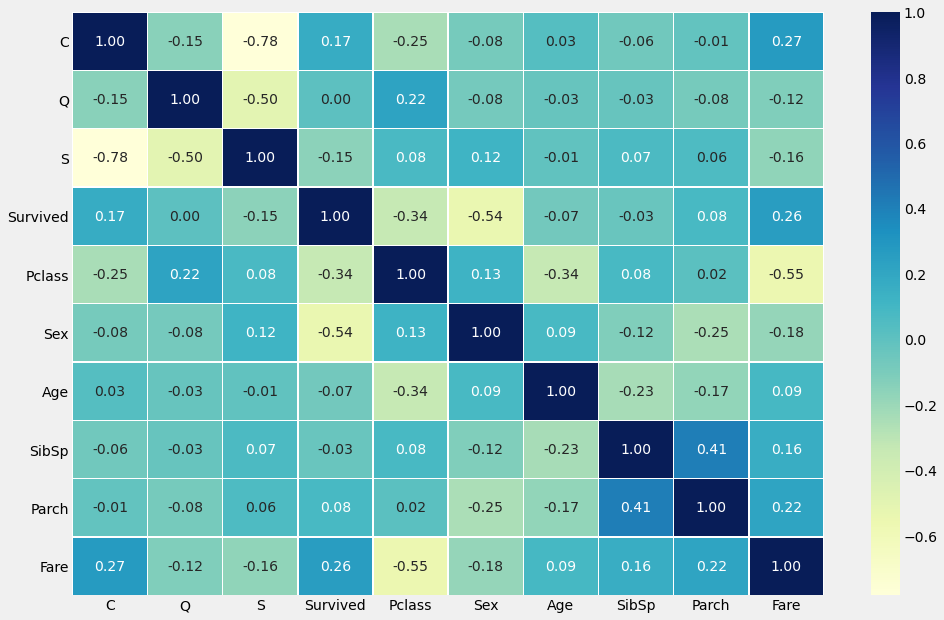

In [43]:
# Time to make my Correlation Matrix pretty in a Correlation HeatMap
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Data that stands out from classification matrix:

### Postive Correlations with Survived:
* Fare (more you paid, the more likely you were to survive)

### Negative Correlations with Survived:
* Sex (more likely to be a women means more likely to survive)
* Pclass (1st class more likely to survive than 3rd class)


# Time to Split Data and Train Model

In [44]:
# Splitting Data into Train and Test
X = df_tidy.drop(["Survived"], axis=1)
y = df_tidy["Survived"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 9), (178, 9), (711,), (178,))

In [47]:
# Put Models in Dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forrest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given learning models
    models : a dict of different Scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing data
    """
    # Set Random Seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Make a loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [48]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/opt/anaconda3/envs/Heart-Disease/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7865168539325843,
 'KNN': 0.7415730337078652,
 'Random Forrest': 0.8314606741573034}

### Model Comparison

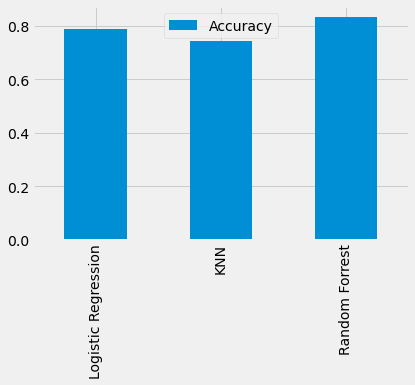

In [49]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

## Hyperparamerter tuning

In [50]:
# Create a hyperparameter grid for logisitc regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForrestClassifier
rf_grid = {"n_estimators" : np.arange(10, 100, 5),
          "max_depth" : [None, 3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(2,20,2)}

In [51]:
# Tune Logistic Regression
np.random.seed(42)

# Setup Random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparamter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [53]:
rs_log_reg.score(X_test, y_test)

0.7921348314606742

In [54]:
np.random.seed(42)

#Setup random hyperparameter
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=50,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   29.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)

In [55]:
rs_rf.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [56]:
rs_rf.score(X_test, y_test)

0.8426966292134831

Randomized seach randomly selects combinations to determine which model is the best model. GridSearchCV exhaustively searches through hyperparameters. 

Order:
* Go by hand, 
* then RandomizedSearchCV, 
* then GridSearchCV. Narrowing down selections as you do so.

### Hyperparameter Tuning with GridSearchCV

Since our logisticsregression model and random forest provides strong and close scores thus far we will try and improve them using GridSearchCV

In [57]:
# Different hyperparameters for our logistics regression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}

# Setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


In [58]:
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [59]:
gs_log_reg.score(X_test, y_test)

0.7921348314606742

In [60]:
np.random.seed(42)

# Refine hyperparameter grid for RandomForrestClassifier based off of previous best params
rf_grid = {"n_estimators" : np.arange(90, 120, 5),
          "max_depth" : [4, 5, 6,],
          "min_samples_split" : np.arange(8,12,1),
          "min_samples_leaf" : np.arange(1,5,1)}

#Setup random hyperparameter
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  4.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([ 8,  9, 10, 11]),
                         'n_estimators': array([ 90,  95, 100, 105, 110, 115])},
             verbose=True)

In [61]:
gs_rf.best_params_

{'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 115}

In [62]:
gs_rf.score(X_test, y_test)

0.8146067415730337

### Evaluating our tuned machine learning classifier beyond accuracy

What do we want:
* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

    ... and it would be great if cross validation was used where possible

To make comparisons and evaluate our trained model we first need to make predictions

## The best accuracy score came from `rs_rf` so I will be using that for my predictions

In [74]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)

In [75]:
y_preds

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0.])

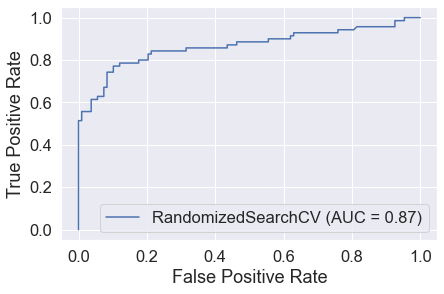

In [76]:
plot_roc_curve(rs_rf, X_test, y_test);

In [77]:
# confusion matrix
confusion_matrix(y_test, y_preds)

array([[97, 11],
       [17, 53]])

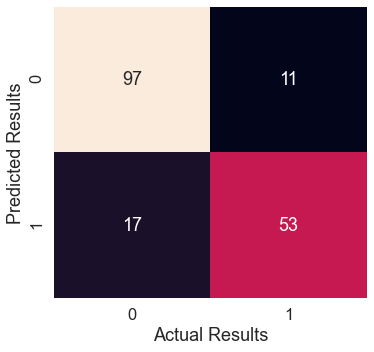

In [78]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                     fmt="g"
                    )
    ax.set(xlabel='Actual Results', ylabel='Predicted Results')
plot_conf_mat(y_test, y_preds)

In [79]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       108
         1.0       0.83      0.76      0.79        70

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



In [80]:
submission_example = pd.read_csv("gender_submission.csv")
submission_example.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Now I need to use my predictions to predict on the test data and create a table like the one above for submission

Steps:
* Imoprt test data
* Make columns identical to the ones that I have
    * Drop columns
    * Turn embarked into ints not objects
* Run clf with best params on the data
* Get rid of columns except for passengerld and survived columns
* Submit on Kaggle

In [81]:
test_data = pd.read_csv("test.csv")
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
test_data = test_data.drop(["Name", "Cabin", "PassengerId", "Ticket"], axis=1)

In [88]:
test_data["Sex"] = test_data["Sex"].str.replace("female", "0")

In [89]:
test_data["Sex"] = test_data["Sex"].str.replace("male", "1").astype(int)

In [90]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,S
414,1,0,39.0,0,0,108.9000,C
415,3,1,38.5,0,0,7.2500,S
416,3,1,NaN,0,0,8.0500,S


In [91]:
df_tidy.head(5)

,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500


In [92]:
# Turn Categories into Numbers for Embarked
categorical_features = ["Embarked"]

# Instatiate OneHotEncoder and Column Transformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                               remainder="passthrough")

transformed_test_data = transformer.fit_transform(test_data)
transformed_test_data

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  1.    , 22.3583]])

In [95]:
final_test_data = pd.DataFrame(transformed_test_data)

In [96]:
final_test_data

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,3.0,1.0,34.5,0.0,0.0,7.8292
1,0.0,0.0,1.0,3.0,0.0,47.0,1.0,0.0,7.0000
2,0.0,1.0,0.0,2.0,1.0,62.0,0.0,0.0,9.6875
3,0.0,0.0,1.0,3.0,1.0,27.0,0.0,0.0,8.6625
4,0.0,0.0,1.0,3.0,0.0,22.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,8.0500
414,1.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,108.9000
415,0.0,0.0,1.0,3.0,1.0,38.5,0.0,0.0,7.2500
416,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,8.0500


In [98]:
fixed_final_test_data = final_test_data
fixed_final_test_data.columns = ["C", "Q", "S","Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
fixed_final_test_data

,C,Q,S,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,3.0,1.0,34.5,0.0,0.0,7.8292
1,0.0,0.0,1.0,3.0,0.0,47.0,1.0,0.0,7.0000
2,0.0,1.0,0.0,2.0,1.0,62.0,0.0,0.0,9.6875
3,0.0,0.0,1.0,3.0,1.0,27.0,0.0,0.0,8.6625
4,0.0,0.0,1.0,3.0,0.0,22.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,8.0500
414,1.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,108.9000
415,0.0,0.0,1.0,3.0,1.0,38.5,0.0,0.0,7.2500
416,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,8.0500


In [100]:
# Okay old X_test looks identical to the final_fixed_test_data so I think I can do my predictions now
# One thing that concerns me are the indices but I will ignore that for now
X_test

,C,Q,S,Pclass,Sex,Age,SibSp,Parch,Fare
827,0.0,1.0,0.0,3.0,1.0,28.0,0.0,0.0,7.7500
194,1.0,0.0,0.0,1.0,0.0,58.0,0.0,0.0,146.5208
251,0.0,0.0,1.0,1.0,1.0,62.0,0.0,0.0,26.5500
695,0.0,0.0,1.0,3.0,1.0,44.0,0.0,0.0,8.0500
49,0.0,0.0,1.0,3.0,0.0,18.0,1.0,0.0,17.8000
...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,1.0,3.0,1.0,28.0,0.0,0.0,15.1000
548,0.0,0.0,1.0,2.0,1.0,8.0,1.0,1.0,36.7500
371,0.0,0.0,1.0,3.0,1.0,19.0,0.0,0.0,8.0500
98,0.0,0.0,1.0,2.0,1.0,34.0,1.0,0.0,26.0000


In [103]:
fixed_final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       418 non-null    float64
 1   Q       418 non-null    float64
 2   S       418 non-null    float64
 3   Pclass  418 non-null    float64
 4   Sex     418 non-null    float64
 5   Age     332 non-null    float64
 6   SibSp   418 non-null    float64
 7   Parch   418 non-null    float64
 8   Fare    417 non-null    float64
dtypes: float64(9)
memory usage: 29.5 KB


In [106]:
# Some of the test data is missing info
# Need to populate then submit
fixed_final_test_data.isna().sum()

C          0
Q          0
S          0
Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [108]:
fixed_final_test_data["Age"].fillna(fixed_final_test_data["Age"].median(), inplace=True)
fixed_final_test_data.isna().sum()

C         0
Q         0
S         0
Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [109]:
fixed_final_test_data["Fare"].fillna(fixed_final_test_data["Fare"].median(), inplace=True)
fixed_final_test_data.isna().sum()

C         0
Q         0
S         0
Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

## Test Data Set is now identical to Training Test Data. Time to run predictions on Test Data Set

In [130]:
final_preds = rs_rf.predict(fixed_final_test_data).astype(int)

In [131]:
final_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [132]:
# Now I have my predictions I need to make that look like the submission criteria. 
# So I need to combine predictions with PassengerID

In [133]:
# Needs to look like this
submission_example.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [134]:
# I must remimport test data set and drop evverything but PassengerID and then add Survived to DF

In [115]:
FINAL_SUBMISSION_TO_KAGGLE = pd.read_csv("test.csv")
FINAL_SUBMISSION_TO_KAGGLE

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [120]:
FINAL_SUBMISSION_TO_KAGGLE.drop(["Sex"], axis=1, inplace=True)

In [135]:
FINAL_SUBMISSION_TO_KAGGLE["Survived"] = final_preds
FINAL_SUBMISSION_TO_KAGGLE

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [136]:
FINAL_SUBMISSION_TO_KAGGLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [137]:
# Exported as csv to upload onto Kaggle
FINAL_SUBMISSION_TO_KAGGLE.to_csv("Predictions.csv", index=False)

In [138]:
did_it_work = pd.read_csv("Predictions.csv")
did_it_work

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


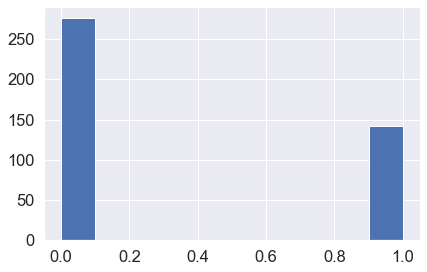

In [139]:
did_it_work["Survived"].hist();